In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.feature_selection import SelectKBest, f_regression, f_classif

from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '~/Documents/GitHub/f1-analytics/'

warnings.filterwarnings("ignore", category=RuntimeWarning) 
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [75]:
merged = pd.read_csv(path+'data/merged.csv')
processed = pd.read_csv(path+'data/processed.csv')

In [76]:
processed

,season,round,circuit_id,driver,constructor,podium,qualifying_pos,stage,q_delta,starting_grid,...,driver_standings_before,constructor_wins_before,constructor_points_before,constructor_standings_before,driver_points_from,driver_points_per,constructor_points_per,points_percentage,driver_last_3,constructor_last_3
0,2014,1,albert_park,nico_rosberg,mercedes,1,3,q3,0.000,3,...,1,0,0.0,1,25.0,0.00,0.00,0.00,0.0,0.0
1,2014,1,albert_park,kevin_magnussen,mclaren,2,4,q3,0.000,4,...,1,0,0.0,1,18.0,0.00,0.00,0.00,0.0,0.0
2,2014,1,albert_park,jenson_button,mclaren,3,11,q2,0.206,10,...,1,0,0.0,1,15.0,0.00,0.00,0.00,0.0,0.0
3,2014,1,albert_park,fernando_alonso,ferrari,4,5,q3,0.000,5,...,1,0,0.0,1,12.0,0.00,0.00,0.00,0.0,0.0
4,2014,1,albert_park,valtteri_bottas,williams,5,10,q3,3.916,15,...,1,0,0.0,1,10.0,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,2022,22,yas_marina,mick_schumacher,haas,16,13,q2,1.401,12,...,16,0,37.0,8,0.0,0.57,1.76,32.43,0.0,3.0
3481,2022,22,yas_marina,kevin_magnussen,haas,17,16,q1,2.010,16,...,13,0,37.0,8,0.0,1.14,1.68,67.57,3.0,3.0
3482,2022,22,yas_marina,lewis_hamilton,mercedes,18,5,q3,0.684,5,...,5,1,505.0,3,0.0,10.91,22.95,47.52,60.0,118.0
3483,2022,22,yas_marina,nicholas_latifi,williams,19,20,q1,2.230,20,...,20,0,8.0,10,0.0,0.09,0.36,25.00,0.0,0.0


In [77]:
merged = merged[merged.season < 2022]
merged.podium = merged.podium.map(lambda x: 1 if x == 1 else 0)
merged = pd.get_dummies(merged, columns=['driver', 'constructor', 'circuit_id', 'country', 'nationality', 'stage']).drop(['date_of_birth', 'lat', 'long', 'date', 'season', 'round'], axis=1)

In [78]:
processed.columns

Index(['season', 'round', 'circuit_id', 'driver', 'constructor', 'podium',
       'qualifying_pos', 'stage', 'q_delta', 'starting_grid',
       'driver_wins_before', 'driver_points_before', 'driver_standings_before',
       'constructor_wins_before', 'constructor_points_before',
       'constructor_standings_before', 'driver_points_from',
       'driver_points_per', 'constructor_points_per', 'points_percentage',
       'driver_last_3', 'constructor_last_3'],
      dtype='object')

In [79]:
processed = processed[processed.season < 2022]
processed.podium = processed.podium.map(lambda x: 1 if x == 1 else 0)

processed = pd.get_dummies(processed, columns=['driver', 'constructor', 'circuit_id', 'stage'])

In [80]:
df = processed.copy()

X = df.drop(['podium', 'driver_points_from'], axis=1)
y = df.podium

# Select the top k best features using the f_classif method
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)

# Get the names and scores of the selected features
scores = selector.scores_
feature_names = X.columns

# Sort the features by score

scores, feature_names = zip(*sorted(zip(scores, feature_names), reverse=True))

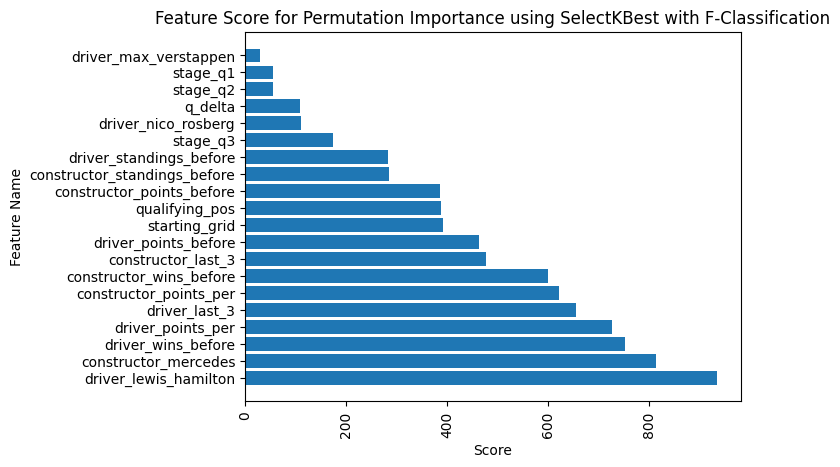

In [81]:
# Plot the scores as a bar chart
k = 20

plt.barh(feature_names[:k], scores[:k])
plt.title('Feature Score for Permutation Importance using SelectKBest with F-Classification')
plt.xlabel('Score')
plt.ylabel('Feature Name')
plt.xticks(rotation=90)
plt.show()

In [82]:
df = processed.copy()

X = df.drop(['podium', 'driver_points_from'], axis=1)
y = df.driver_points_from

# Select the top k best features using the f_regression method
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)

# Get the names and scores of the selected features
scores = selector.scores_
feature_names = X.columns

# Sort the features by score

scores, feature_names = zip(*sorted(zip(scores, feature_names), reverse=True))

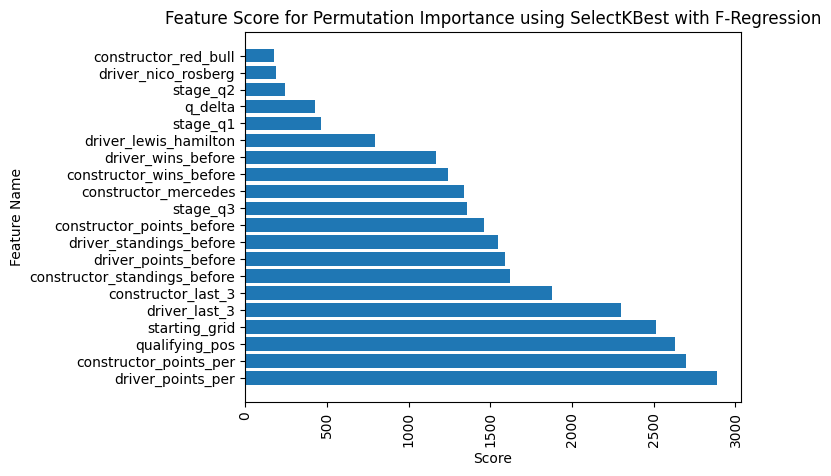

In [83]:
# Plot the scores as a bar chart
k = 20

plt.barh(feature_names[:k], scores[:k])
plt.title('Feature Score for Permutation Importance using SelectKBest with F-Regression')
plt.xlabel('Score')
plt.ylabel('Feature Name')
plt.xticks(rotation=90)
plt.show()

In [84]:
# linear regression feature importance
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LinearRegression

# define and fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate the permutation importance of the features
perm = PermutationImportance(model).fit(X, y)

# Sort the features by importance
imp_df = eli5.explain_weights_df(perm, feature_names=list(X.columns))
imp_df = imp_df.sort_values("weight", ascending=False)

# Print the top k features
print(imp_df[:15])

                      feature    weight       std
0              qualifying_pos  0.249908  0.008206
1               starting_grid  0.092287  0.004881
2       driver_lewis_hamilton  0.053387  0.003300
3                    stage_q1  0.031673  0.002871
4                    stage_q3  0.027661  0.003070
5        constructor_mercedes  0.025155  0.001567
6           driver_points_per  0.022682  0.001820
7         constructor_ferrari  0.013959  0.000529
8   constructor_points_before  0.013691  0.002171
9       driver_max_verstappen  0.011944  0.001695
10        driver_nico_rosberg  0.008863  0.001125
11       constructor_red_bull  0.007801  0.000957
12     constructor_toro_rosso  0.006959  0.001697
13    driver_sebastian_vettel  0.004877  0.001081
14         driver_wins_before  0.002660  0.000796
